In [1]:
import os
import shutil
import random


In [2]:
edible_mushrooms = ["almond_mushroom", "amethyst_chanterelle", "aniseed_funnel", "bay_bolete", "beefsteak_fungus", "black_morel", "chanterelle", "chestnut_bolete", "chicken_of_the_woods", "common_morel", "common_puffball", "field_mushroom", "giant_funnel", "giant_puffball", "golden_waxcap", "hedgehog_fungus", "hen_of_the_woods", "honey_fungus", "horse_mushroom", "jelly_ears", "jelly_tooth", "king_alfreds_cakes", "lions_mane", "meadow_waxcap", "morel", "oak_bolete", "orange_peel_fungus", "oyster_mushroom", "parasol", "penny_bun", "pine_bolete", "saffron_milkcap", "shaggy_parasol", "slippery_jack", "st_georges_mushroom", "summer_bolete", "the_miller", "the_prince", "thimble_morel", "tripe_fungus", "truffles", "turkey_tail", "velvet_shank", "winter_chanterelle", "wood_mushroom"]

poisonous_mushrooms = ["amanita_gemmata", "ascot_hat", "bearded_milkcap", "beechwood_sickener", "bitter_beech_bolete", "bitter_bolete", "black_bulgar", "blackening_brittlegill", "blackening_waxcap", "blue_roundhead", "blushing_bracket", "bovine_bolete", "brown_birch_bolete", "brown_rollrim", "bruising_webcap", "butter_cap", "cedarwood_waxcap", "charcoal_burner", "cinnamon_bracket", "clouded_agaric", "clustered_domecap", "common_bonnet", "common_inkcap", "common_rustgill", "crimped_gill", "crimson_waxcap", "cucumber_cap", "curry_milkcap", "deadly_fibrecap", "deadly_webcap", "deathcap", "deer_shield", "destroying_angel", "devils_bolete", "dog_stinkhorn", "dryads_saddle", "dusky_puffball", "dyers_mazegill", "earthballs", "egghead_mottlegill", "elfin_saddle", "fairy_ring_champignons", "false_chanterelle", "false_deathcap", "false_morel", "false_saffron_milkcap", "fenugreek_milkcap", "field_blewit", "fleecy_milkcap", "fly_agaric", "fools_funnel", "fragrant_funnel", "freckled_dapperling", "frosted_chanterelle", "funeral_bell", "geranium_brittlegill", "glistening_inkcap", "golden_bootleg", "golden_scalycap", "greencracked_brittlegill", "grey_knight", "grey_spotted_amanita", "grisettes", "hairy_curtain_crust", "heath_waxcap", "hoof_fungus", "horn_of_plenty", "inky_mushroom", "jubilee_waxcap", "larch_bolete", "leccinum_albostipitatum", "liberty_cap", "lilac_bonnet", "lilac_fibrecap", "lurid_bolete", "macro_mushroom", "magpie_inkcap", "medusa_mushroom", "mosaic_puffball", "oak_mazegill", "oak_polypore", "ochre_brittlegill", "old_man_of_the_woods", "orange_birch_bolete", "orange_bolete", "orange_grisette", "pale_oyster", "panthercap", "parrot_waxcap", "pavement_mushroom", "peppery_bolete", "pestle_puffball", "pink_waxcap", "plums_and_custard", "poison_pie", "poplar_bell", "poplar_fieldcap", "porcelain_fungus", "powdery_brittlegill", "purple_brittlegill", "red_belted_bracket", "red_cracking_bolete", "root_rot", "rooting_bolete", "rooting_shank", "rosy_bonnet", "ruby_bolete", "scarlet_caterpillarclub", "scarlet_elfcup", "scarlet_waxcap", "scarletina_bolete", "semifree_morel", "sepia_bolete", "shaggy_bracket", "shaggy_inkcap", "shaggy_scalycap", "sheathed_woodtuft", "silky_rosegill", "silverleaf_fungus", "slender_parasol", "slimy_waxcap", "smoky_bracket", "snakeskin_grisette", "snowy_waxcap", "spectacular_rustgill", "splendid_waxcap", "splitgill", "spotted_toughshank", "spring_fieldcap", "stinkhorn", "stinking_dapperling", "stubble_rosegill", "stump_puffball", "suede_bolete", "sulphur_tuft", "tawny_funnel", "tawny_grisette", "terracotta_hedgehog", "the_blusher", "the_deceiver", "the_goblet", "the_sickener", "tuberous_polypore", "vermillion_waxcap", "warted_amanita", "weeping_widow", "white_dapperling", "white_domecap", "white_false_death_cap", "white_fibrecap", "white_saddle", "wood_blewit", "woodland_inkcap", "woolly_milkcap", "wrinkled_peach", "yellow_false_truffle", "yellow_foot_waxcap", "yellow_stagshorn", "yellow_stainer", "yellow_swamp_brittlegill"]

print(len(edible_mushrooms))
print(len(poisonous_mushrooms))

45
160


In [3]:
# define the path to the data folder
data_path = r"C:\Users\ADMIN\Desktop\mushroom_img_classification\data"

# define the path to the new dataset folder
# new_dataset_path = r"C:\Users\ADMIN\Desktop\mushroom_img_classification\data_new"



## CREATE Posonous folder and Edible folder
- Create two folders, one for poisonous mushrooms and one for edible mushrooms with images from the dataset.
- The images are stored in the folders with the following format: 
    - poisonous/1.jpg, poisonous/2.jpg, ..., poisonous/n.jpg
    - edible/1.jpg, edible/2.jpg, ..., edible/n.jpg

In [4]:
optimized_data_path = r"C:\Users\ADMIN\Desktop\mushroom_img_classification\data_optimized"

# create the new dataset folder
if not os.path.exists(optimized_data_path):
    os.makedirs(optimized_data_path)

# create 2 folders inside the optimized data folder: edible and poisonous the folder should contain the images of the respective mushrooms from the original dataset

# create the edible folder
edible_path = os.path.join(optimized_data_path, "edible")
if not os.path.exists(edible_path):
    os.makedirs(edible_path)

# create the poisonous folder
poisonous_path = os.path.join(optimized_data_path, "poisonous")
if not os.path.exists(poisonous_path):
    os.makedirs(poisonous_path)



In [ ]:
import time
import shutil

# copy the images of the edible mushrooms to the edible folder note that the images in the original dataset are in folders named after the type of mushroom. For example, the images of the almond mushroom are in a folder named almond_mushroom fetch all the images in almond_mushroom and dump them to the edible folder proceed to the second type of mushroom and repeat the process

# copy the images of the edible mushrooms
for mushroom in edible_mushrooms:
    print(mushroom)
    mushroom_path = os.path.join(data_path, mushroom)
    for img in os.listdir(mushroom_path):
        img_path = os.path.join(mushroom_path, img)
        # prepend the mushroom name to create a unique filename
        unique_name = f"{mushroom}_{img}"
        dest_path = os.path.join(edible_path, unique_name)
        shutil.copy(img_path, dest_path)
    
        






In [ ]:
# copy the images of the poisonous mushrooms to the poisonous folder
for mushroom in poisonous_mushrooms:
    print(mushroom)
    mushroom_path = os.path.join(data_path, mushroom)
    for img in os.listdir(mushroom_path):
        img_path = os.path.join(mushroom_path, img)
        # prepend the mushroom name to create a unique filename
        unique_name = f"{mushroom}_{img}"
        dest_path = os.path.join(poisonous_path, unique_name)
        shutil.copy(img_path, dest_path)

In [5]:
# check if all images in new dataset are valid
import cv2
import imghdr

img_extensions = ['jpg', 'jpeg', 'png']

count = 0

for folder in os.listdir(optimized_data_path):
    folder_path = os.path.join(optimized_data_path, folder)
    print(f"Checking images in {folder} folder")
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        if imghdr.what(img_path) not in img_extensions:
            print(f"Invalid image: {img_path}")
            count += 1

print(f"Total invalid images: {count}")
    
        
            
    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11692\3497835717.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Checking images in edible folder
Checking images in poisonous folder
Total invalid images: 0


In [6]:
import tensorflow as tf

cpu_devices = tf.config.experimental.list_physical_devices('CPU') # get the list of GPUs
# for device in gpu_devices:
#     tf.config.experimental.set_memory_growth(device, True)


# tf.config.list_physical_devices('CPU')

# Load data

In [237]:
import tensorflow as tf

data = tf.keras.utils.image_dataset_from_directory(optimized_data_path, batch_size=96)


Found 2979 files belonging to 2 classes.


In [238]:
data_iterator = data.as_numpy_iterator()

In [239]:
# Get another batch from iterator

batch = data_iterator.next()

In [240]:
batch[0].shape

(96, 256, 256, 3)

In [241]:
# class 0 = edible
# class 1 = poisonous

batch[0]

array([[[[ 12.75,   8.75,   7.75],
         [ 13.75,  10.  ,   8.75],
         [ 17.75,  14.  ,  12.75],
         ...,
         [ 28.25,  29.25,  23.25],
         [ 35.5 ,  35.  ,  26.  ],
         [ 42.75,  40.  ,  30.25]],

        [[ 20.25,  16.25,  14.25],
         [ 23.75,  19.75,  17.75],
         [ 25.25,  21.5 ,  19.25],
         ...,
         [ 29.25,  30.25,  24.5 ],
         [ 41.25,  40.  ,  32.5 ],
         [ 43.5 ,  40.5 ,  32.5 ]],

        [[ 26.25,  22.75,  18.75],
         [ 30.5 ,  27.  ,  23.  ],
         [ 29.  ,  26.  ,  21.75],
         ...,
         [ 33.5 ,  34.75,  28.75],
         [ 42.5 ,  41.25,  34.75],
         [ 43.25,  40.  ,  34.  ]],

        ...,

        [[ 36.5 ,  27.75,  22.5 ],
         [ 63.75,  54.  ,  41.5 ],
         [ 65.  ,  54.  ,  34.75],
         ...,
         [ 53.  ,  63.  ,  21.  ],
         [ 61.25,  76.75,  27.  ],
         [ 68.25,  84.25,  37.  ]],

        [[ 35.25,  23.75,  22.75],
         [ 56.25,  42.75,  38.25],
         [ 5

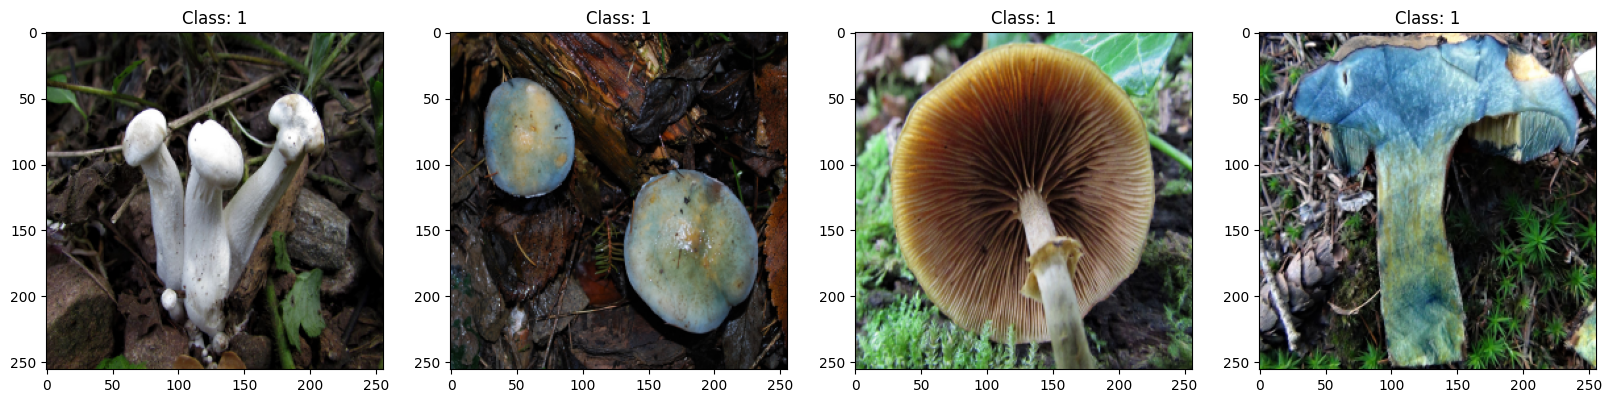

In [242]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):  
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(f"Class: {batch[1][idx]}")

# Preprocess Data

#### Scale Data

In [243]:
data = data.map(lambda x, y: (x / 255.0, y))

In [244]:
scaled_iterator = data.as_numpy_iterator()

In [245]:
scaled_batch = scaled_iterator.next()
scaled_batch[0].max(), scaled_batch[0].min()

(np.float32(1.0), np.float32(0.0))

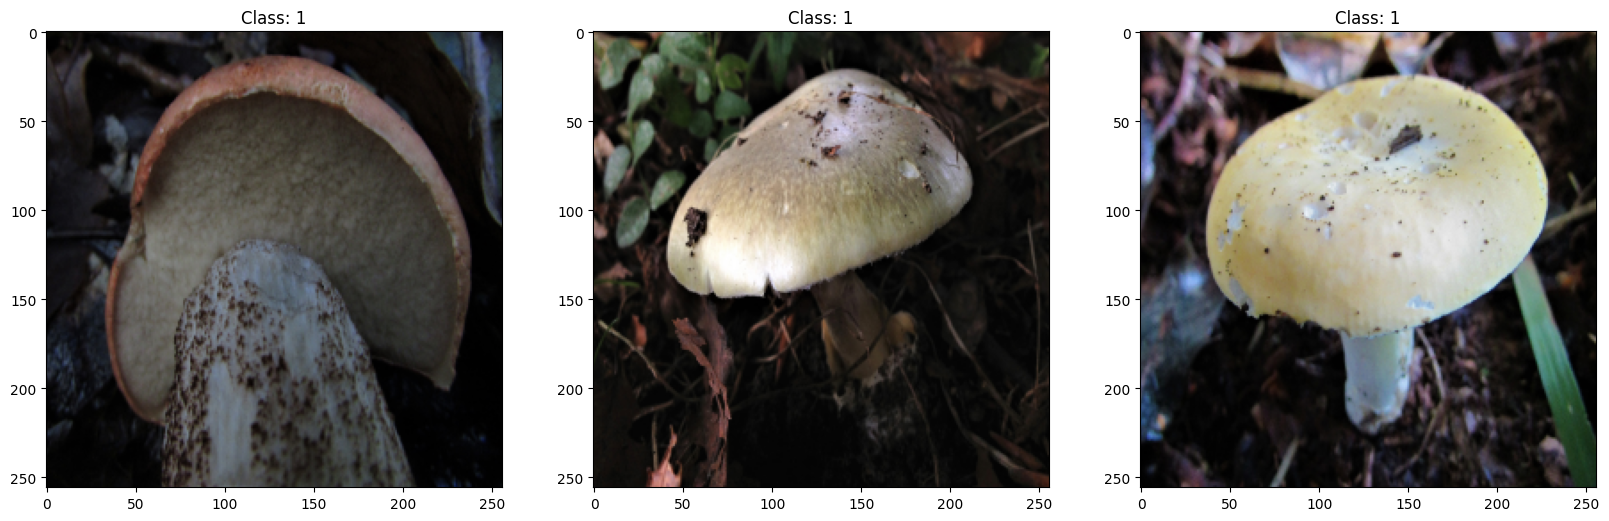

In [246]:


fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for idx, image in enumerate(scaled_batch[0][:3]):
    ax[idx].imshow(image) # convert the image to unsigned 8-bit integer.
    ax[idx].title.set_text(f"Class: {scaled_batch[1][idx]}")

#### Split Data

In [247]:
len(data)

32

In [248]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))+1
test_size = int(0.1 * len(data))+1


In [249]:
train_size+val_size+test_size

33

In [250]:
train = data.take(train_size) # take the first 70% of the data
val = data.skip(train_size).take(val_size) # skip the first 70% and take the next 20%
test = data.skip(train_size+val_size).take(test_size) # skip the first 90% and take the rest

In [251]:
len(train), len(val), len(test)

(22, 7, 3)

# Deep Learning Model

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [253]:
model = Sequential()

In [254]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), 1, activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [255]:
model.compile(optimizer='adam', loss=tf._losses.binary_crossentropy, metrics=['accuracy'])

In [256]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,769,697 (56.34 MB)

 Trainable params: 14,769,697 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [257]:
logdir = r"C:\Users\ADMIN\Desktop\mushroom_img_classification\logs"

In [258]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [331]:
hist = model.fit(train, validation_data=val, epochs=20, callbacks=[tensorboard_callback], batch_size=96)



Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 153s 7s/step - accuracy: 0.9998 - loss: 0.0025 - val_accuracy: 0.9360 - val_loss: 0.3683
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9479 - val_loss: 0.3029
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9494 - val_loss: 0.3688
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 0.9464 - val_loss: 0.3133
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.9977 - loss: 0.0090 - val_accuracy: 0.9554 - val_loss: 0.2716
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step - accuracy: 0.9998 - loss: 0.0033 - val_accuracy: 0.9509 - val_loss: 0.3100
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.9999 - loss: 0.0026 - val_accuracy: 0.9554 - val_loss: 0.3637
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9405 - val_

In [332]:
hist.history

{'accuracy': [0.9990530014038086,
  0.9995265007019043,
  0.9985795617103577,
  0.998106062412262,
  0.998106062412262,
  0.9995265007019043,
  0.9990530014038086,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9995265007019043,
  1.0,
  1.0,
  0.9995265007019043,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.004544683266431093,
  0.002681499579921365,
  0.01998649537563324,
  0.010519272647798061,
  0.009373768232762814,
  0.005126394797116518,
  0.008282863534986973,
  0.0032806952949613333,
  0.0013807772193104029,
  0.0006094406126067042,
  0.0006647175177931786,
  0.0021039554849267006,
  0.0015114465495571494,
  0.00043492490658536553,
  0.0028148365672677755,
  0.0011469703167676926,
  0.0005326395039446652,
  0.0003242188540752977,
  0.0004296684346627444,
  0.00014062566333450377],
 'val_accuracy': [0.9360119104385376,
  0.9479166865348816,
  0.949404776096344,
  0.9464285969734192,
  0.9553571343421936,
  0.9508928656578064,
  0.9553571343421936,
  0.9404761791229248,
  0.9464285969734192

## Plot performance

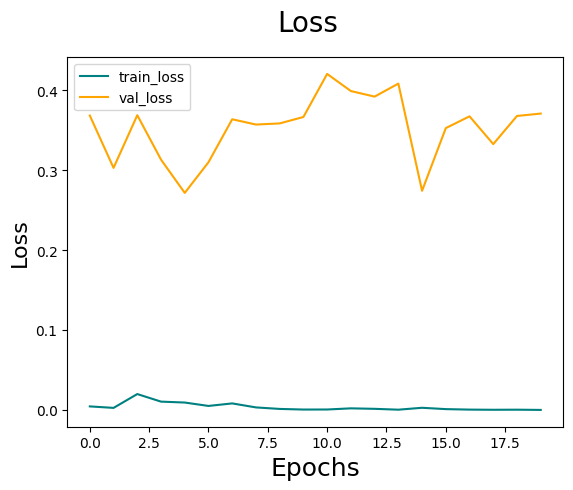

In [333]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='train_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc='upper left')
plt.show()

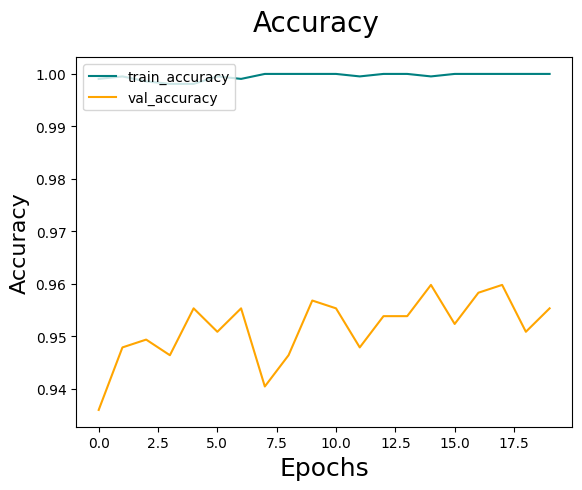

In [334]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='train_accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc='upper left')
plt.show()

# Evaluate performance

In [335]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [304]:
pre = Precision()
rec = Recall()
bin_acc = BinaryAccuracy()

In [336]:
for batch in test.as_numpy_iterator():
    images, labels = batch
    preds = model.predict(images)
    pre.update_state(labels, preds)
    rec.update_state(labels, preds)
    bin_acc.update_state(labels, preds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [337]:
print(f"Precision: {pre.result().numpy()}")
print(f"Recall: {rec.result().numpy()}")
print(f"Binary Accuracy: {bin_acc.result().numpy()}")

Precision: 0.9707792401313782
Recall: 0.9645161032676697
Binary Accuracy: 0.9487179517745972


# Test Model

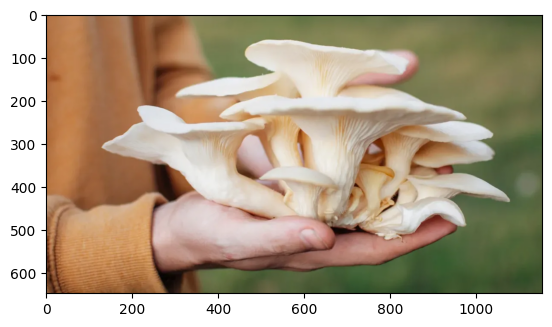

In [350]:
img = cv2.imread(r'C:\Users\ADMIN\Desktop\mushroom_img_classification\oyster3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

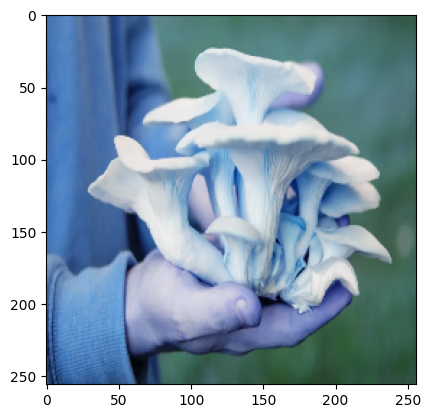

In [351]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [352]:
import numpy as np

preds = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [353]:
preds

array([[0.12308215]], dtype=float32)

In [354]:
if preds > 0.5:
    print("Mushroom is Poisonous")
else:
    print("Mushroom is Edible")

Mushroom is Edible


# Save the Model

In [177]:
from tensorflow.keras.models import load_model

In [178]:
models_folder = r"C:\Users\ADMIN\Desktop\mushroom_img_classification\models"

model.save(os.path.join(models_folder, 'mushroom_img_model.keras'))